In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import os
import importlib
FILE_DIRECTORY = os.path.realpath('')
ROOT_DIRECTORY = os.path.split(FILE_DIRECTORY)[0]
SRC_DIRECTORY = os.path.join(ROOT_DIRECTORY,'src')
MODEL_DIRECTORY = os.path.join(ROOT_DIRECTORY,'model')
IMGS_DIRECTORY = os.path.join(ROOT_DIRECTORY,'images')
sys.path.append(ROOT_DIRECTORY)
sys.path.append(SRC_DIRECTORY)
sys.path.append(MODEL_DIRECTORY)
from waldo_plotter import *
%matplotlib inline

In [58]:
df1 = pd.read_csv(os.path.join(MODEL_DIRECTORY,'model_v1_metrics.csv'))

In [1]:
df2 = pd.read_csv(os.path.join(MODEL_DIRECTORY,'model_v2_metrics.csv'))

NameError: name 'pd' is not defined

In [ ]:
waldo1 = WaldoCNN(50, 10, 'data/Keras Generated/Train',
                     'data/Keras Generated/Test',
                     'data/Keras Generated/Holdout', 1,
                     load_model=os.path.join(MODEL_DIRECTORY,
                                             'model_v1.h5'))


In [ ]:
waldo2 = WaldoCNN(50, 10, 'data/Keras Generated/Train',
                     'data/Keras Generated/Test',
                     'data/Keras Generated/Holdout', 2,
                     load_model=os.path.join(MODEL_DIRECTORY,
                                             'model_v2.h5'))


In [59]:
waldoplt1 = wp.WaldoPlotter(df1, waldo1 ,[0.583, 0.905])
waldoplt2 = wp.WaldoPlotter(df, waldo2 ,[0.584,0.952])

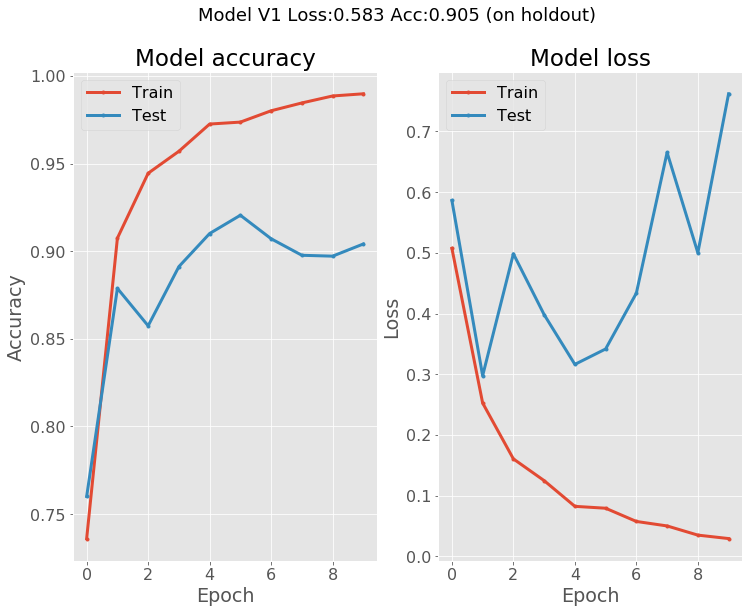

In [61]:
waldoplt1.create_accuracy_loss(os.path.join(IMGS_DIRECTORY,'model_V1_plot.jpg'))

In [ ]:
waldoplt2.create_accuracy_loss(os.path.join(IMGS_DIRECTORY,'model_V1_plot.jpg'))